___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Input, Dropout, BatchNormalization
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [4]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
print(f"There are {len(X_train)} images in the training dataset")
print(f"There are {len(X_test)} images in the test dataset")

There are 60000 images in the training dataset
There are 10000 images in the test dataset


In [6]:
X_train.shape 

(60000, 28, 28)

In [7]:
 X_test.shape

(10000, 28, 28)

In [8]:
y_train.shape

(60000,)

In [9]:
y_test.shape

(10000,)

In [10]:
X_train[0].shape

(28, 28)

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [11]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

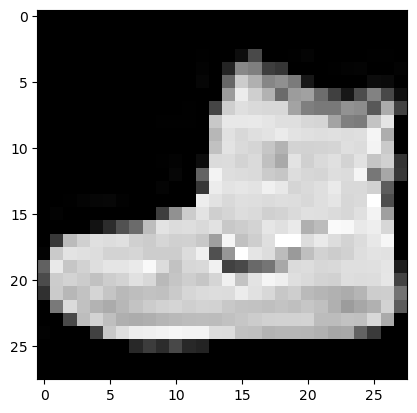

In [12]:
plt.imshow(X_train[0], cmap="gray")

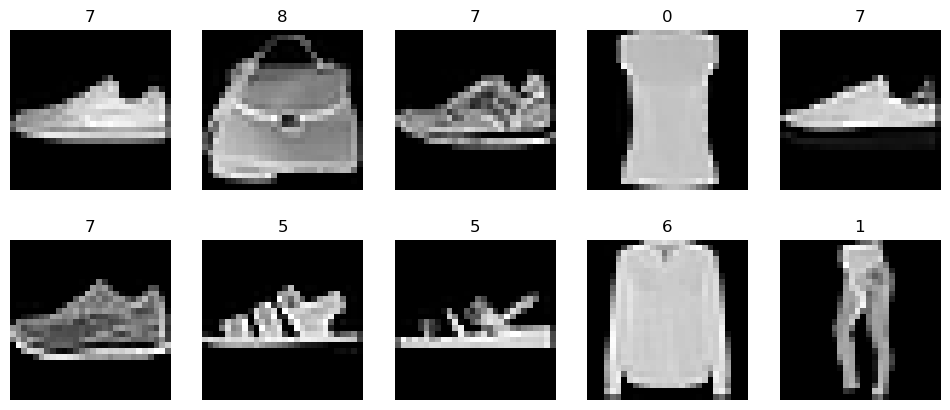

In [13]:
f, axes = plt.subplots(2, 5, figsize=(12, 5))

for ax in axes.ravel():
    idx = np.random.randint(0, len(X_train))
    ax.axis("off")
    ax.set_title(y_train[idx])
    ax.imshow(X_train[idx], cmap="gray")
plt.show()

<Axes: >

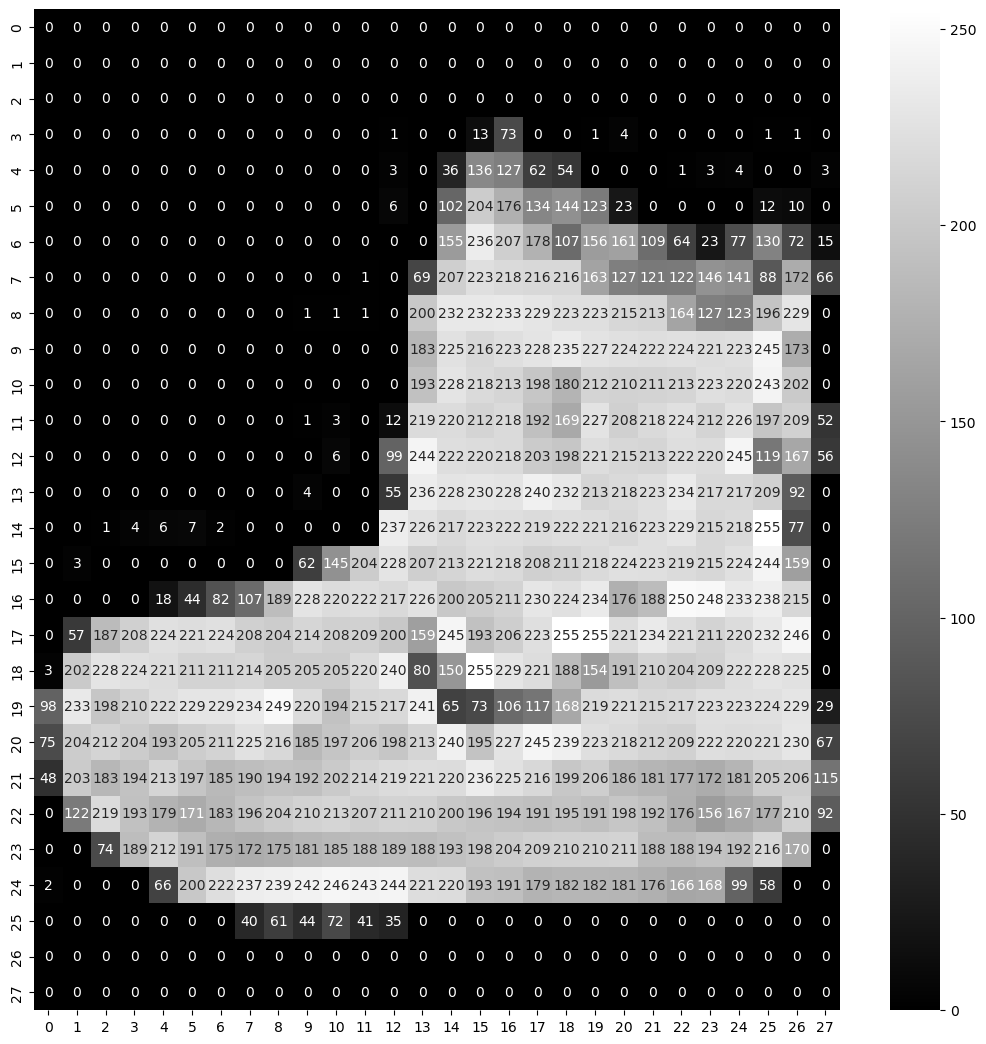

In [14]:
import seaborn as sns
plt.figure(figsize=(13, 13))
sns.heatmap(X_train[0], annot=True, cmap="gray", fmt=".3g")

In [15]:
classes[y_train[0]]

'Ankle boot'

In [16]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [17]:
X_train[0].min()

0

In [18]:
X_train[0].max()

255

In [19]:
# Normalize the data by dividing by the max value

X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train = X_train / 255
X_test = X_test / 255



In [20]:
X_train[0].min()

0.0

In [21]:
X_train[0].max()

1.0

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [22]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [23]:
X_train = np.expand_dims(X_train, axis=3)
X_train.shape

(60000, 28, 28, 1)

In [24]:
X_train = np.expand_dims(X_train, 3)
X_test = np.expand_dims(X_test, 3)

In [25]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1, 1)
(10000, 28, 28, 1)


In [26]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [27]:
y_train.shape

(60000,)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [28]:
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)


In [29]:
print(Y_train.shape)
print(Y_test.shape)

(60000, 10)
(10000, 10)


In [30]:
y_train[0]

9

In [31]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [32]:
classes[y_train[0]]

'Ankle boot'

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [33]:
# Create a sequential model
model = Sequential()

# Add a 2D Convolutional Layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))

# Add a Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))

# Add a Flatten Layer
model.add(Flatten())

# Add a Dense Layer with 128 neurons and RELU activation
model.add(Dense(128, activation='relu'))

# Add the final Dense Layer with 10 neurons and softmax activation
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])



In [34]:
# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 25, 25, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 20000)             0         
                                                                 
 dense (Dense)               (None, 128)               2560128   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2561738 (9.77 MB)
Trainable params: 2561738 (9.77 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [35]:
early_stop = EarlyStopping(
    monitor="val_accuracy", mode="max", patience=25, restore_best_weights=True
)

In [37]:
model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_test, Y_test),
    callbacks=[early_stop],)


Epoch 1/100
1875/1875 [==============================] - 105s 56ms/step - loss: 0.3258 - accuracy: 0.8846 - val_loss: 0.2979 - val_accuracy: 0.8905
Epoch 2/100
1875/1875 [==============================] - 97s 52ms/step - loss: 0.2430 - accuracy: 0.9107 - val_loss: 0.2816 - val_accuracy: 0.8988
Epoch 3/100
1875/1875 [==============================] - 93s 50ms/step - loss: 0.2053 - accuracy: 0.9251 - val_loss: 0.2547 - val_accuracy: 0.9101
Epoch 4/100
1875/1875 [==============================] - 94s 50ms/step - loss: 0.1759 - accuracy: 0.9353 - val_loss: 0.2782 - val_accuracy: 0.9097
Epoch 5/100
1875/1875 [==============================] - 96s 51ms/step - loss: 0.1524 - accuracy: 0.9441 - val_loss: 0.2819 - val_accuracy: 0.9107
Epoch 6/100
1875/1875 [==============================] - 96s 51ms/step - loss: 0.1343 - accuracy: 0.9519 - val_loss: 0.3383 - val_accuracy: 0.9002
Epoch 7/100
1875/1875 [==============================] - 101s 54ms/step - loss: 0.1184 - accuracy: 0.9580 - val_loss:

**TASK 7: Plot values of metrics you used in your model.**

In [38]:
model.metrics_names

['loss', 'accuracy']

In [39]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.325781,0.884650,0.297913,0.8905
1,0.243005,0.910750,0.281560,0.8988
2,0.205343,0.925050,0.254709,0.9101
3,0.175920,0.935267,0.278158,0.9097
4,0.152450,0.944150,0.281910,0.9107


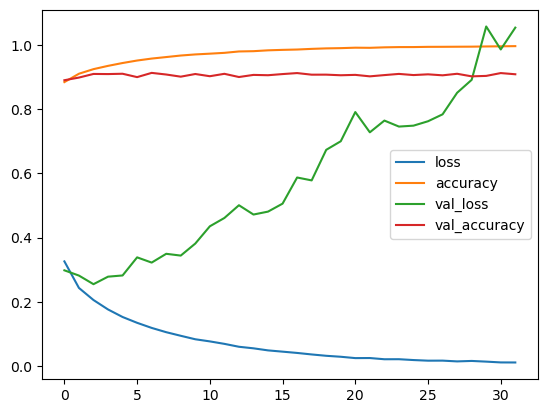

In [40]:
loss_df.plot()
plt.show();

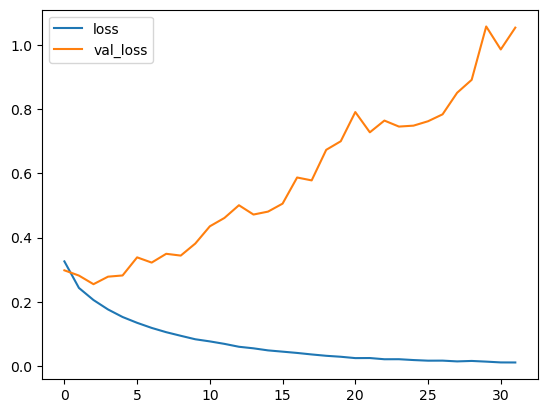

In [41]:
loss_df[["loss", "val_loss"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

In [44]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.3220 - accuracy: 0.9134


[0.3220480978488922, 0.9133999943733215]

In [45]:
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.3220480978488922
Test accuracy: 0.9133999943733215


## Prediction

In [46]:
pred_prob = model.predict(X_test)
pred_prob

313/313 [==============================] - 4s 11ms/step


array([[2.44382820e-10, 7.47799107e-14, 2.65144046e-10, ...,
        1.06196785e-05, 6.29852698e-11, 9.99989390e-01],
       [2.51283772e-09, 6.01790405e-22, 1.00000000e+00, ...,
        2.00114668e-14, 1.40370143e-20, 1.03003406e-20],
       [1.29085327e-13, 1.00000000e+00, 6.54958433e-16, ...,
        1.08292790e-18, 3.37621192e-16, 8.41133694e-17],
       ...,
       [3.93757292e-13, 4.53405643e-20, 7.08575643e-10, ...,
        4.36563632e-12, 1.00000000e+00, 2.41847964e-14],
       [1.12986057e-13, 1.00000000e+00, 1.25729058e-13, ...,
        4.47881310e-17, 1.03541805e-15, 9.41221859e-14],
       [3.41034989e-04, 1.59831343e-05, 2.04353733e-03, ...,
        5.08778319e-02, 1.89478360e-02, 1.75516792e-02]], dtype=float32)

In [47]:
y_pred = np.argmax(pred_prob, axis=1)

In [48]:
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1000
           1       0.99      0.98      0.99      1000
           2       0.80      0.91      0.85      1000
           3       0.91      0.92      0.92      1000
           4       0.88      0.82      0.85      1000
           5       0.99      0.97      0.98      1000
           6       0.83      0.70      0.76      1000
           7       0.96      0.97      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.96      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [50]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [51]:
print(confusion_matrix(y_test, y_pred))

[[899   1  25  13   3   1  51   1   6   0]
 [  0 982   0  13   2   0   1   0   2   0]
 [ 14   0 907   8  37   1  33   0   0   0]
 [ 18   5  11 922  23   0  19   0   2   0]
 [  2   1 105  25 823   1  42   0   1   0]
 [  0   0   0   0   0 973   0  14   0  13]
 [137   0  76  26  48   0 705   0   8   0]
 [  0   0   0   0   0   2   0 972   0  26]
 [  4   0   3   5   0   2   3   3 980   0]
 [  1   0   0   0   0   3   0  25   0 971]]


- Rows represent the actual classes, and columns represent the predicted classes.

- Row and Column Labels: The rows correspond to the predicted classes, and the columns correspond to the actual (true) classes.

- Diagonal Values: These are the true positive counts. For example, the value at position (0, 0) is 899, indicating that 899 instances of class 0 were correctly predicted as class 0. Similarly, the value at position (1, 1) is 982, meaning 982 instances of class 1 were correctly predicted as class 1, and so on.

- Off-Diagonal Values: These are the misclassification counts. For example, the value at position (0, 2) is 25, indicating that 25 instances of class 2 were incorrectly predicted as class 0.

- Interpreting Rows: If you sum up the values in each row, you'll get the total predictions made for each class. For example, in the first row, you have 1000 instances predicted as class 0, with 899 of them being correct predictions.

- Interpreting Columns: If you sum up the values in each column, you'll get the actual number of instances for each true class. For example, in the first column, there were 171 instances of the true class 0, and 899 of them were correctly predicted as class 0.

- Here's a breakdown of the matrix you provided:

- Class 0: The model predicted 899 instances correctly as class 0, misclassified 14 instances as class 2, 18 instances as class 3, and so on.

- Class 1: The model predicted 982 instances correctly as class 1, misclassified 1 instance as class 0, 5 instances as class 3, and so on.

- Class 2: The model predicted 907 instances correctly as class 2, misclassified 105 instances as class 4, 76 instances as class 6, and so on.

- Class 3: The model predicted 922 instances correctly as class 3, misclassified 25 instances as class 2, 11 instances as class 4, and so on.

- Class 4: The model predicted 823 instances correctly as class 4, misclassified 37 instances as class 2, 23 instances as class 3, and so on.

- Class 5: The model predicted 973 instances correctly as class 5, misclassified 1 instance as class 0, 3 instances as class 8, and so on.

- Class 6: The model predicted 705 instances correctly as class 6, misclassified 51 instances as class 0, 33 instances as class 2, and so on.

- Class 7: The model predicted 972 instances correctly as class 7, misclassified 26 instances as class 9, 14 instances as class 5, and so on.

- Class 8: The model predicted 980 instances correctly as class 8, misclassified 6 instances as class 0, 2 instances as class 3, and so on.

- Class 9: The model predicted 971 instances correctly as class 9, misclassified 25 instances as class 7, 13 instances as class 5, and so on.

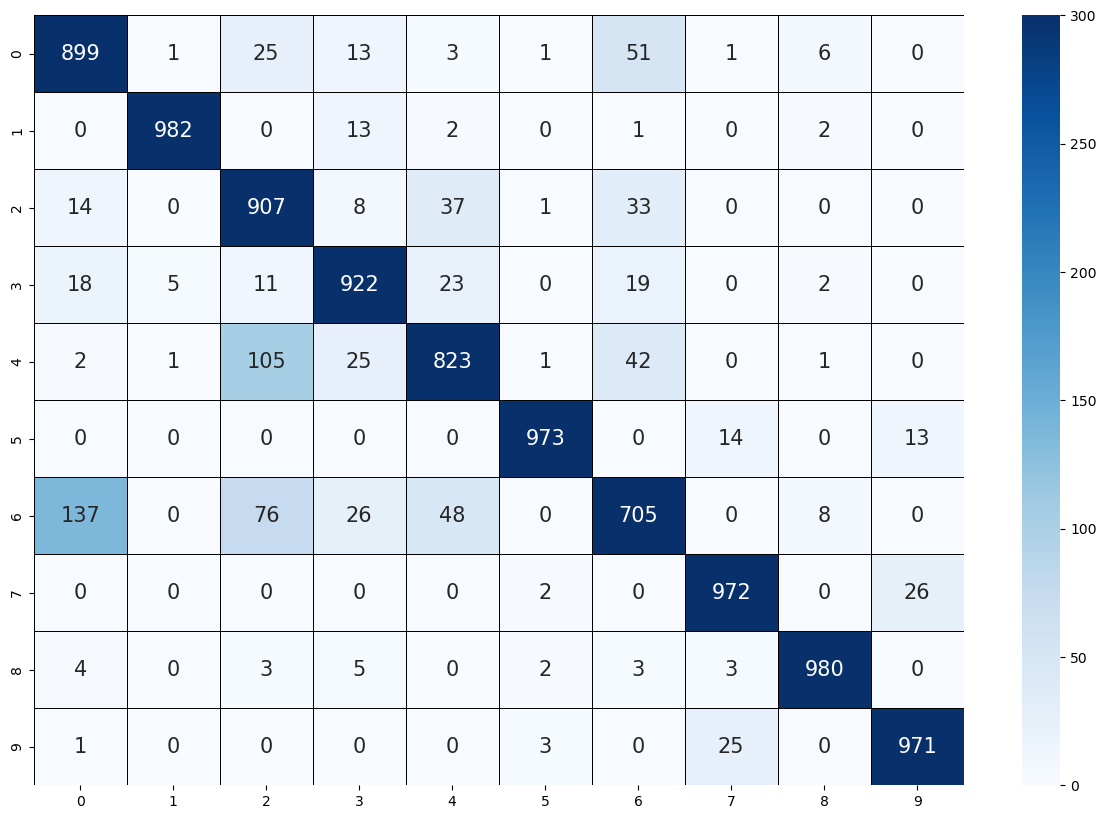

In [52]:
plt.figure(figsize=(15, 10))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    linecolor="black",
    fmt="g",
    annot_kws={"size": 15},
    vmax=300,
)
plt.show()

In [54]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___